In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

df

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,id-001,22.34,0.56,g,o,u,9.43,25.38,-20.91,-25.84,4.08,B
1,id-002,-2.31,7.36,i,p,y,-3.94,NaN,31.65,12.95,9.82,C
2,id-003,-17.55,-4.09,f,l,v,-11.02,-1.77,-17.57,15.98,11.43,D
3,id-004,-13.54,-5.42,g,p,x,4.11,2.22,16.72,9.86,16.43,A
4,id-005,13.39,-3.20,i,l,v,2.23,11.76,1.34,4.16,-6.49,B
...,...,...,...,...,...,...,...,...,...,...,...,...
485,id-486,12.54,3.16,h,m,v,-3.49,-16.43,-3.70,-4.12,-2.83,D
486,id-487,8.10,-2.49,i,m,u,-10.61,-1.63,-8.81,18.60,10.92,B
487,id-488,13.72,-10.59,i,m,y,-32.73,-3.94,NaN,8.97,-8.30,C
488,id-489,-6.12,-6.37,e,m,u,22.34,-4.66,-10.86,-17.77,-0.21,C


## Cleaning Data

In [3]:
df['id'] = df['id'].fillna(0)
features = ['x1','x2','x6','x7','x8','x9','x10']
for col in features:
    df[col] = df[col].fillna(0)

df = df.dropna()

cols = ['x3','x4','x5']

for i in cols:
    df[i] = df[i].apply(ord)

C:\Users\chiss\AppData\Local\Temp\ipykernel_13100\1881437147.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].apply(ord)


In [4]:
df

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,id-001,22.34,0.56,103,111,117,9.43,25.38,-20.91,-25.84,4.08,B
1,id-002,-2.31,7.36,105,112,121,-3.94,0.00,31.65,12.95,9.82,C
2,id-003,-17.55,-4.09,102,108,118,-11.02,-1.77,-17.57,15.98,11.43,D
3,id-004,-13.54,-5.42,103,112,120,4.11,2.22,16.72,9.86,16.43,A
4,id-005,13.39,-3.20,105,108,118,2.23,11.76,1.34,4.16,-6.49,B
...,...,...,...,...,...,...,...,...,...,...,...,...
485,id-486,12.54,3.16,104,109,118,-3.49,-16.43,-3.70,-4.12,-2.83,D
486,id-487,8.10,-2.49,105,109,117,-10.61,-1.63,-8.81,18.60,10.92,B
487,id-488,13.72,-10.59,105,109,121,-32.73,-3.94,0.00,8.97,-8.30,C
488,id-489,-6.12,-6.37,101,109,117,22.34,-4.66,-10.86,-17.77,-0.21,C


## Label

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
LE = LabelEncoder()
df['y']=LE.fit_transform(df['y'])


C:\Users\chiss\AppData\Local\Temp\ipykernel_13100\3015604079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y']=LE.fit_transform(df['y'])


C:\Users\chiss\AppData\Local\Temp\ipykernel_13100\463211526.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')


<AxesSubplot: >

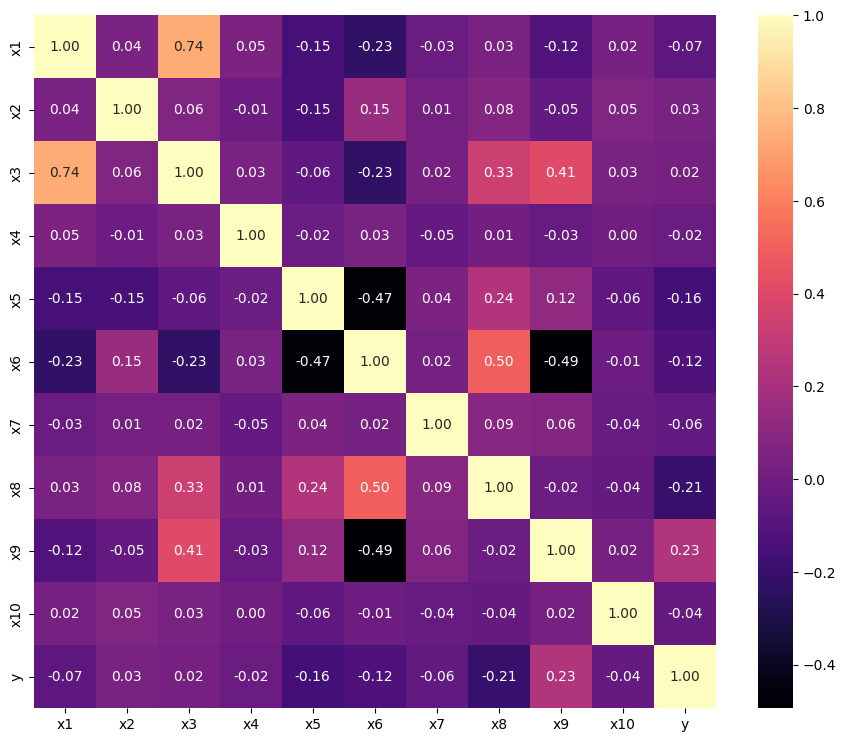

In [7]:
plt.figure(figsize=(11,9))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

## Training

In [8]:
X = df.iloc[:,1:10]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 99)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

cv = KFold(n_splits=10, random_state=1, shuffle=True)

grid_params_knn = { 'n_neighbors' : range(1,20)}

gs = GridSearchCV(KNeighborsClassifier(), grid_params_knn, cv=cv)
gs.fit(X_train, y_train)
gs.best_params_

{'n_neighbors': 19}

In [11]:
knn_final = KNeighborsClassifier(n_neighbors = 10)
knn_final.fit(X_train, y_train)
knn_final.score(X_test,y_test)

0.6764705882352942

In [12]:
accuracy = []
count = []
for i in range (1,41):
  knn_manual = KNeighborsClassifier(n_neighbors = i)
  knn_manual.fit(X_train, y_train)
  accuracy.append(knn_manual.score(X_test,y_test))
  count.append(i)

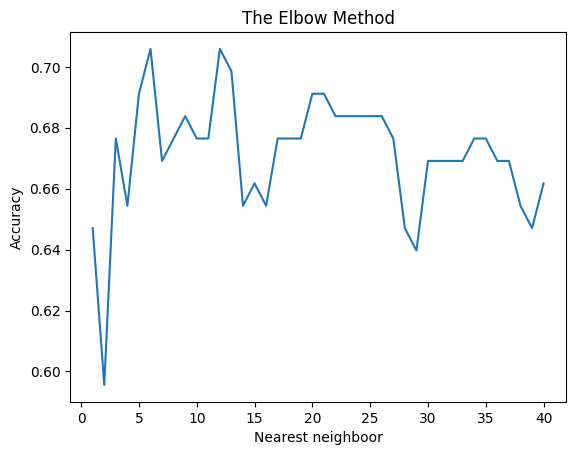

In [13]:
plt.title('The Elbow Method')
plt.plot(count,accuracy)
plt.xlabel('Nearest neighboor')
plt.ylabel('Accuracy')
plt.show()

## New Data

In [14]:
df_new = pd.read_csv("unseen.csv")

df_new

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,Q01,-9.06,-6.24,e,l,y,-17.25,13.47,-9.97,-9.37,8.36
1,Q02,-10.93,-0.05,e,l,y,-5.69,-6.59,-8.48,-17.99,-8.84
2,Q03,-9.06,0.07,e,p,y,-26.56,7.69,-15.15,-9.59,-21.66
3,Q04,5.94,10.92,h,n,v,36.03,-2.95,22.84,-16.83,7.12
4,Q05,27.87,37.07,i,m,u,1.32,0.71,-17.56,-6.77,4.05
5,Q06,-9.49,1.17,g,n,u,31.70,-18.75,3.05,5.02,19.09
6,Q07,1.78,-1.09,e,l,u,41.81,8.74,-2.88,-42.59,-5.83
7,Q08,-5.82,8.85,e,p,u,30.82,7.79,-20.49,-41.73,-1.85
8,Q09,-6.36,-2.47,e,l,y,-2.79,21.72,-6.36,-27.26,-13.94
9,Q10,-16.34,-8.00,g,o,u,1.29,-7.36,-11.29,23.43,-2.02


In [15]:
cols = ['x3','x4','x5']

for i in cols:
    df_new[i] = df_new[i].apply(ord)

In [16]:
X_new = df_new.iloc[:, 1:10]
y_new = df_new.iloc[:,-1]

In [17]:
y_new = LE.fit_transform(y_new)

In [18]:
knn_new = KNeighborsClassifier(n_neighbors = 10)
knn_new.fit(X_train, y_train)
y_pred = knn_new.predict(X_new)


y_pred

array([3, 0, 0, 1, 1, 3, 1, 2, 0, 3])

In [19]:
ans = []
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        ans.append('A')
    elif y_pred[i] == 1:
        ans.append('B')
    elif y_pred[i] == 2:
        ans.append('C')
    elif y_pred[i] == 3:
        ans.append('D')


ans

['D', 'A', 'A', 'B', 'B', 'D', 'B', 'C', 'A', 'D']